# Análise de teste A/B realizado para e-commerce. 

# Introdução: 

A análise do teste A/B denominado "recommender_system_test" foi concebida com o objetivo de avaliar as mudanças relacionadas à introdução de um sistema de recomendação aprimorado em uma loja online internacional. 

Este teste, iniciado em 07-12-2020 e concluído em 01-01-2021, envolveu dois grupos distintos: o Grupo A (Controle) e o Grupo B (Funil de Novos Pagamentos).

O propósito fundamental foi observar melhorias nas taxas de conversão nas etapas-chave do funil de vendas: visualizações de página do produto (product_page), adição de itens ao carrinho (product_cart) e compras (purchase). 
Esperava-se um aumento mínimo de 10% em cada etapa do funil, dentro de um período de até 14 dias após o cadastro.

O número planejado de participantes para este teste A/B foi estabelecido em 6000, visando garantir uma base estatisticamente significativa para a análise dos resultados. 
Este projeto visa não apenas compreender o impacto da introdução do novo sistema de recomendação, mas também avaliar se as alterações implementadas alcançaram os resultados esperados.

A análise completa deste projeto buscará examinar detalhadamente as métricas de conversão, comparar os resultados entre os grupos de controle e teste, considerar a significância estatística e, finalmente, fornecer conclusões que orientem a tomada de decisões futuras em relação ao sistema de recomendação implementado.

Este relatório busca oferecer uma compreensão abrangente do desempenho do teste A/B e orientar ações futuras com base em evidências concretas e análises robustas.

# Baixando os dados: 

In [1]:
# importando as bibliotecas necessárias para essa análise:

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# baixando os conjuntos de dados:

marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')

new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')

new_users_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')

test_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

In [3]:
marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [4]:
new_users

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
58698,1DB53B933257165D,2020-12-20,EU,Android
58699,538643EB4527ED03,2020-12-20,EU,Mac
58700,7ADEE837D5D8CBBD,2020-12-20,EU,PC
58701,1C7D23927835213F,2020-12-20,EU,iPhone


In [5]:
new_users_events

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [6]:
test_participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


# Análise exploratória dos dados (AED) : 

## marketing_events 

In [7]:
# visualizando informações básicas do conjunto de dados:

marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [8]:
# visualizando estatísticas básicas: 

marketing_events.describe()

,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Easter Promo,APAC,2020-07-04,2020-07-11
freq,1,4,1,1


In [9]:
# Consultando se existem dados duplicados:

marketing_events.duplicated().sum()

0

In [10]:
# Alterando o tipo dos dados das colunas 'start_dt' e 'finish_dt' para Datetime:

marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])

In [11]:
marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


## new_users

In [12]:
# visualizando informações básicas do conjunto de dados:

new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [13]:
# visualizando estatísticas básicas: 

new_users.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,31BF5EE63818001F,2020-12-21,EU,Android
freq,1,6077,43396,26159


In [14]:
# Consultando se existem dados duplicados:

new_users.duplicated().sum()

0

In [15]:
# Alterando o tipo dos dados da coluna 'first_date' para Datetime:

new_users['first_date'] = pd.to_datetime(new_users['first_date'])

In [16]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


## new_users_events

In [17]:
# visualizando informações básicas do conjunto de dados:

new_users_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


A coluna 'details' possuí muitos valores ausentes, essa coluna possuí detalhes sobre o evento realizado, como por exemplo o total do pedido em USD para aquele evento.

Sendo assim conclui que a coluna 'details' só possuí valores quando ocorreu uma compra  de fato, então os valores estão diretamete ligados a coluna 'event_name', a coluna 'details' só apresenta valores quando a coluna 'event_name' é igual a 'purchase' 

In [18]:
new_users_events['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

Podemos observar que a contagem para 'purchase' na coluna 'event_name' é a mesma contagem de valores na coluna 'details' 

In [19]:
# visualizando estatísticas básicas em new_users_events:

new_users_events.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [20]:
# Consultando se existem dados duplicados:

new_users_events.duplicated().sum()

0

Agora que sabemos a origem dos valores ausentes, irei substituí-los por 0 para depois dar continuidade a nossa análise.

In [21]:
# substituindo os valores ausentes em 'details' por 0:

new_users_events['details'].fillna(0, inplace=True)

In [22]:
# Alterando o tipo dos dados da coluna 'event_dt' para Datetime:

new_users_events['event_dt'] = pd.to_datetime(new_users_events['event_dt'])

In [23]:
new_users_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     423761 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


Sabemos que só foram aceitos novos usuários no periodo entre 07-12-2020 até 21-12-2020 (new_users)

e os eventos realizados pelos novos usuários foram entre 07-12-2020 até 01-01-2021 (new_users_events)

Sabendo disso, irei exibir os dados que não estão dentro desse período especifico, e dependendo da quantidade irei descartar esses dados para que não afetem nossa análise.


In [24]:
# Definindo o período especificado
start_date_new_users = pd.to_datetime('2020-12-07')
end_date_new_users = pd.to_datetime('2020-12-21')

# Filtrando os dados fora do período especificado em new_users
out_of_range_new_users = new_users[(new_users['first_date'] < start_date_new_users) | (new_users['first_date'] > end_date_new_users)]

# Exibindo os dados fora do período em new_users
print("Dados fora do período em `new_users`:")
print(out_of_range_new_users)



Dados fora do período em `new_users`:
                user_id first_date     region   device
22757  5815F7ECE74D949F 2020-12-22        CIS       PC
22758  32EAEA5E903E3BC1 2020-12-22  N.America  Android
22759  9DF7A3C46487EF0B 2020-12-22         EU  Android
22760  ADE98C6440423287 2020-12-22         EU   iPhone
22761  5A5833D3AEA75255 2020-12-22  N.America       PC
...                 ...        ...        ...      ...
32118  165AFCBF42C043F8 2020-12-23         EU       PC
32119  54E7F36C0E976E24 2020-12-23         EU  Android
32120  7E43EB2E03A33E78 2020-12-23         EU       PC
32121  B8B679DEE9F2CA06 2020-12-23         EU       PC
32122  BE595EE3E9D59FB9 2020-12-23         EU       PC

[5263 rows x 4 columns]


fazendo o mesmo para new_users_events:

In [25]:
# Definindo o período especificado para new_users_events
start_date_new_users_events = pd.to_datetime('2020-12-07')
end_date_new_users_events = pd.to_datetime('2021-01-01')

# Filtrando os dados fora do período especificado em new_users_events
out_of_range_new_users_events = new_users_events[(new_users_events['event_dt'] < start_date_new_users_events) | (new_users_events['event_dt'] > end_date_new_users_events)]

# Exibindo os dados fora do período em new_users_events
print("\nDados fora do período em `new_users_events`:")
print(out_of_range_new_users_events)


Dados fora do período em `new_users_events`:
Empty DataFrame
Columns: [user_id, event_dt, event_name, details]
Index: []


Verifiquei que existem 5263 linhas/usuários que não correspondem ao periodo especificado, irei excluir essas linhas do de new_users para então dar sequencia na análise

In [26]:
#Eliminando os dados fora do periodo especifico: 

new_users = new_users.drop(out_of_range_new_users.index)

In [27]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53440 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     53440 non-null  object        
 1   first_date  53440 non-null  datetime64[ns]
 2   region      53440 non-null  object        
 3   device      53440 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.0+ MB


## test_participants

In [28]:
# visualizado informações básicas do conjunto de dados:

test_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [29]:
# visualizando estatísticas básicas:

test_participants.describe()

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,7CEFBD3C6ABEF91A,A,interface_eu_test
freq,2,8214,10850


In [30]:
# Consultando se existem dados duplicados:

test_participants.duplicated().sum()

0

In [31]:
# Visualizando a contage de usuários que realizou cada teste:

test_participants['ab_test'].value_counts()

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

# Vamos enriquecer nossa etapa de EDA. 

Começando pela visualização da distribuição dos eventos por dia.

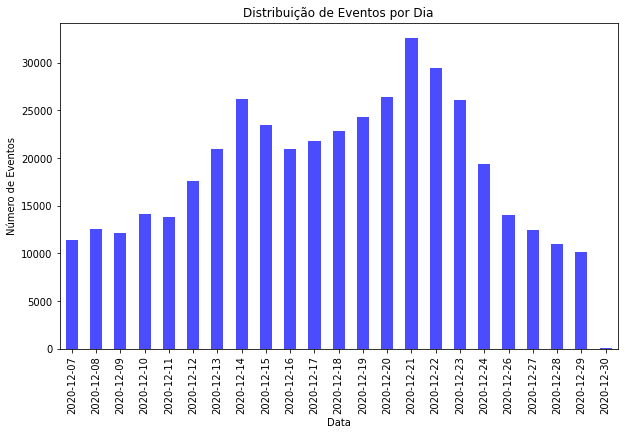

In [32]:
# Obtendo a distribuição de eventos por dia
events_per_day = new_users_events.groupby(new_users_events['event_dt'].dt.date).size()

# Plotando o gráfico de distribuição de eventos por dia
plt.figure(figsize=(10, 6))
events_per_day.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Distribuição de Eventos por Dia')
plt.xlabel('Data')
plt.ylabel('Número de Eventos')
plt.show()

Agora vamos visualizar a quantidade de usuários por dia da semana.

Primeiro irei criar uma nova coluna em new_users contendo o dia da semana que o usuário fez o registro e depois plotar um gráfico mostrando os resultados.

In [33]:
# Criando a nova coluna 'day_of_week'
new_users['day_of_week'] = new_users['first_date'].dt.day_name()

# Exibindo o DataFrame atualizado
new_users.head()

,user_id,first_date,region,device,day_of_week
0,D72A72121175D8BE,2020-12-07,EU,PC,Monday
1,F1C668619DFE6E65,2020-12-07,N.America,Android,Monday
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,Monday
3,50734A22C0C63768,2020-12-07,EU,iPhone,Monday
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone,Monday


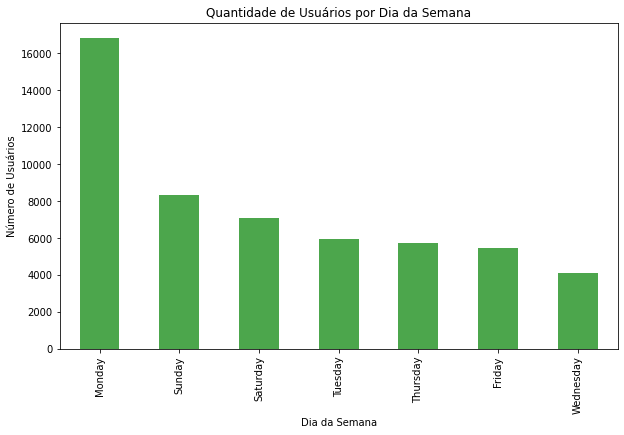

In [34]:
# Contando a quantidade de usuários por dia da semana
users_per_day_of_week = new_users['day_of_week'].value_counts()

# Plotando o gráfico de quantidade de usuários por dia da semana
plt.figure(figsize=(10, 6))
users_per_day_of_week.plot(kind='bar', color='green', alpha=0.7)
plt.title('Quantidade de Usuários por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Número de Usuários')
plt.show()

O gráfico mostra que o dia com mais acessos na semana é a segunda-feira, seguida pelo domingo e depois sábado.

Vamos visualizar a quantidade de usuários por dispositivo:

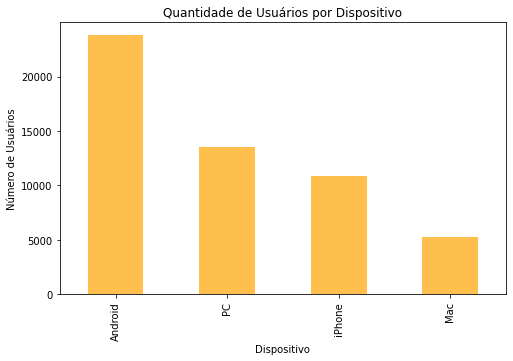

In [35]:
# Contando a quantidade de usuários por dispositivo
users_per_device = new_users['device'].value_counts()

# Plotando o gráfico de quantidade de usuários por dispositivo
plt.figure(figsize=(8, 5))
users_per_device.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Quantidade de Usuários por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Número de Usuários')
plt.show()

Os dispositivos mais usado pelos usuários são do tipo Android, seguidos pelos usuários de PC e depois iphone e mac na sequencia.

Agora vamos ver a receita adiquirida por dispositivo (quanto foi vendido em USD em cada tipo de dispositivo): 

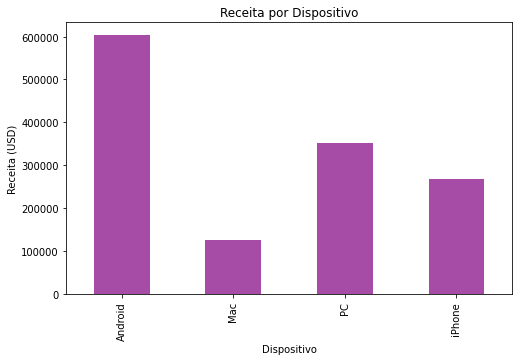

In [36]:
# Unindo os DataFrames para obter a receita por dispositivo
revenue_per_device = pd.merge(new_users_events, new_users[['user_id', 'device']], on='user_id', how='inner')

# Calculando a receita por dispositivo
revenue_per_device = revenue_per_device.groupby('device')['details'].sum()

# Plotando o gráfico de receita por dispositivo
plt.figure(figsize=(8, 5))
revenue_per_device.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Receita por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Receita (USD)')
plt.show()

Agora vamos visualizar a quantidade de usuários por região:

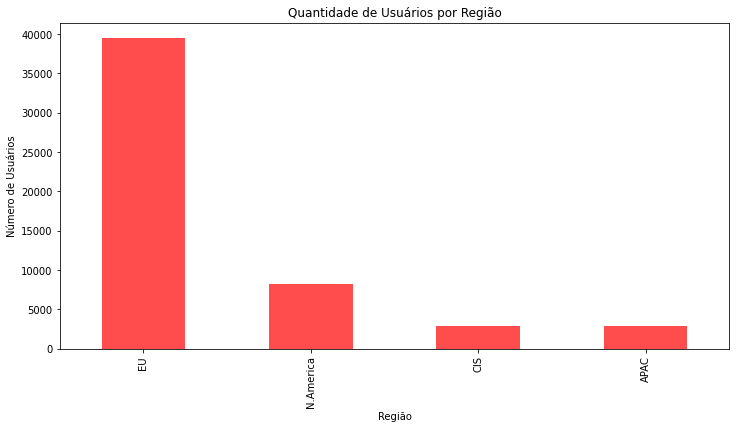

In [37]:
# Contando a quantidade de usuários por região
users_per_region = new_users['region'].value_counts()

# Plotando o gráfico de quantidade de usuários por região
plt.figure(figsize=(12, 6))
users_per_region.plot(kind='bar', color='red', alpha=0.7)
plt.title('Quantidade de Usuários por Região')
plt.xlabel('Região')
plt.ylabel('Número de Usuários')
plt.show()

Agora vamos ver o número de usuários por grupo:

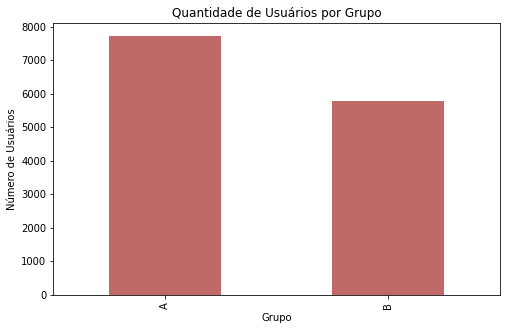

In [38]:
# Unindo os DataFrames para obter a quantidade de usuários por grupo
users_per_group = pd.merge(test_participants, new_users, on='user_id', how='inner')

# Contando a quantidade de usuários por grupo
users_per_group = users_per_group.groupby('group').size()

# Plotando o gráfico de quantidade de usuários por grupo
plt.figure(figsize=(8, 5))
users_per_group.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Quantidade de Usuários por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Número de Usuários')
plt.show()

O gráfico acima mostra uma diferença de quase 2000 usuários entre o grupo A e grupo B. 
Sendo o grupo A o que possui o maior número de usuários.


A diferença significativa no número de usuários entre os grupos A e B, como indicado pelo gráfico "Quantidade de Usuários por Grupo", é um aspecto importante a ser considerado na análise do teste A/B. Uma diferença grande no tamanho dos grupos pode impactar a validade estatística dos resultados.

# Agora vamos estudar o funil e analisar a conversão em cada uma das etapas.

- Visualizações de Página do Produto (product_page):

vamos calcular a taxa de conversão para cada grupo (A e B) nesta etapa.

vamos comparar as taxas de conversão entre os grupos.

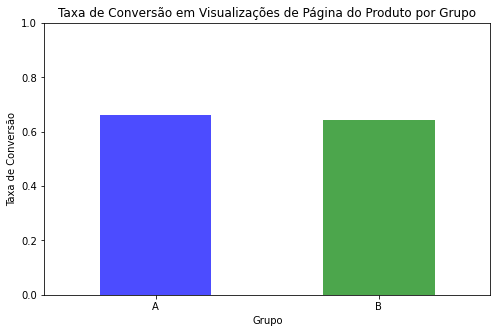

In [39]:
# Filtrando eventos de visualizações de página do produto
product_page_events = new_users_events[new_users_events['event_name'] == 'product_page']

# Unindo com os participantes do teste
product_page_data = pd.merge(product_page_events, test_participants, on='user_id', how='inner')

# Calculando a taxa de conversão para cada grupo
conversion_rate_product_page = product_page_data.groupby('group')['user_id'].nunique() / test_participants.groupby('group')['user_id'].nunique()

# Criando o gráfico de barras para visualização
plt.figure(figsize=(8, 5))
conversion_rate_product_page.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Taxa de Conversão em Visualizações de Página do Produto por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Conversão')
plt.ylim(0, 1)  # Define o limite do eixo y entre 0 e 1
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.show()

- Adição de Itens ao Carrinho (product_cart):

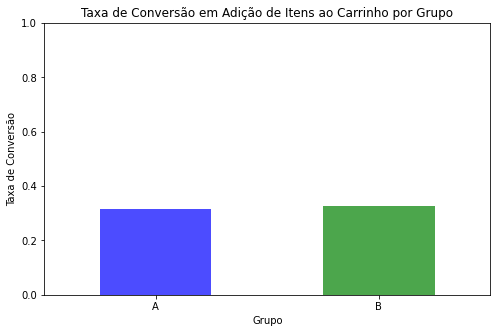

In [40]:
# Filtrando eventos de adição de itens ao carrinho
product_cart_events = new_users_events[new_users_events['event_name'] == 'product_cart']

# Unindo com os participantes do teste
product_cart_data = pd.merge(product_cart_events, test_participants, on='user_id', how='inner')

# Calculando a taxa de conversão para cada grupo
conversion_rate_product_cart = product_cart_data.groupby('group')['user_id'].nunique() / test_participants.groupby('group')['user_id'].nunique()

# Criando o gráfico de barras para visualização
plt.figure(figsize=(8, 5))
conversion_rate_product_cart.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Taxa de Conversão em Adição de Itens ao Carrinho por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Conversão')
plt.ylim(0, 1)  # Define o limite do eixo y entre 0 e 1
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.show()

- Compras (purchase):

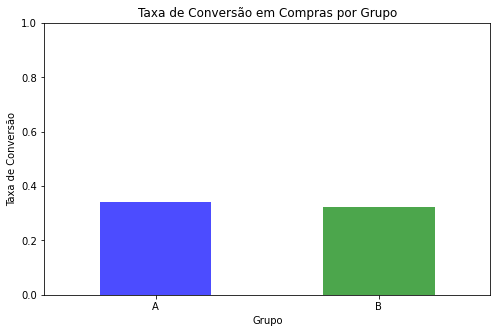

In [41]:
# Filtrando eventos de compras
purchase_events = new_users_events[new_users_events['event_name'] == 'purchase']

# Unindo com os participantes do teste
purchase_data = pd.merge(purchase_events, test_participants, on='user_id', how='inner')

# Calculando a taxa de conversão para cada grupo
conversion_rate_purchase = purchase_data.groupby('group')['user_id'].nunique() / test_participants.groupby('group')['user_id'].nunique()

# Criando o gráfico de barras para visualização
plt.figure(figsize=(8, 5))
conversion_rate_purchase.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Taxa de Conversão em Compras por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Taxa de Conversão')
plt.ylim(0, 1)  # Define o limite do eixo y entre 0 e 1
plt.xticks(rotation=0)  # Mantém os rótulos do eixo x na horizontal
plt.show()

O funil de novos pagamentos (Grupo B) parece ter uma taxa de conversão um pouco menor em comparação com o Grupo A nas etapas de adição de itens ao carrinho e compras.

Mais a frente vamos fazer uma análise estatística para determinar a significância dessas diferenças.

Para verificar se o número de eventos por usuário é distribuído igualmente entre as amostras (Grupos A e B), podemos calcular a média do número de eventos por usuário em cada grupo e comparar esses valores. Vamos realizar essa análise:

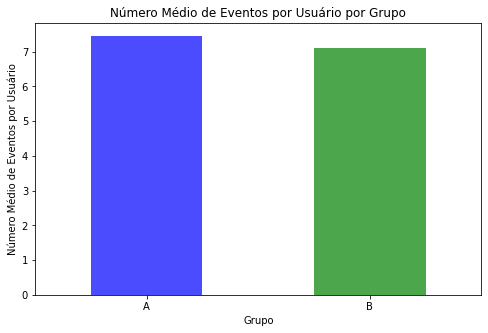

In [42]:
# Unindo os eventos dos novos usuários com os participantes do teste
events_with_group = pd.merge(new_users_events, test_participants, on='user_id', how='inner')

# Calculando o número médio de eventos por usuário em cada grupo
avg_events_per_user = events_with_group.groupby(['group', 'user_id'])['event_name'].count().groupby('group').mean()

# Criando o gráfico de barras para visualização
plt.figure(figsize=(8, 5))
avg_events_per_user.plot(kind='bar', color=['blue', 'green'], alpha=0.7)
plt.title('Número Médio de Eventos por Usuário por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Número Médio de Eventos por Usuário')
plt.xticks(rotation=0)  
plt.show()

Embora haja uma diferença, a magnitude da variação não parece ser significativa. 


Agora vamos analisar como o número de eventos é distribuído ao longo dos dias. 

Vamos criar um gráfico de linha para cada grupo (A e B) que mostra a tendência do número de eventos em cada dia. 

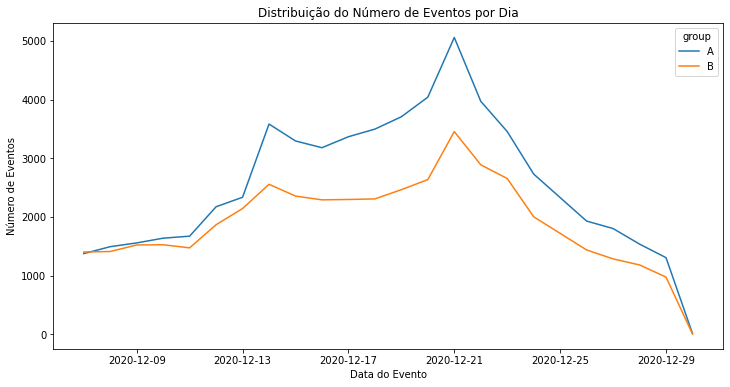

In [43]:
# Unindo os eventos dos novos usuários com os participantes do teste
events_with_group = pd.merge(new_users_events, test_participants, on='user_id', how='inner')

# Convertendo a coluna de data para o formato de data
events_with_group['event_dt'] = pd.to_datetime(events_with_group['event_dt']).dt.date

# Agrupando eventos por dia e grupo
events_by_day_group = events_with_group.groupby(['event_dt', 'group'])['event_name'].count().reset_index()

# Plotando o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(data=events_by_day_group, x='event_dt', y='event_name', hue='group')
plt.title('Distribuição do Número de Eventos por Dia')
plt.xlabel('Data do Evento')
plt.ylabel('Número de Eventos')
plt.show()

O gráfico mostra que o número de eventos diários é sempre superior para o grupo A, os dois grupos seguiram um padrão semelhante com relação ao aumento e diminuição do número de eventos. 

Existem quaisquer particularidades nos dados que devem ser consideradas antes de começar o teste A/B?

Sim! a primeira coisa é a contagem das amostras para cada grupo, que é bem desigual.
O periodo de teste também é muito curto.

Com base nas análises realizadas até agora, podemos fazer algumas observações preliminares sobre os resultados do teste A/B. Aqui estão algumas considerações:

- Taxa de Conversão em Etapas do Funil:

Nas etapas do funil (visualizações de página do produto, adições de itens ao carrinho e compras), observamos que as taxas de conversão variam entre os grupos A (controle) e B (funil de novos pagamentos).
A taxa de conversão em visualizações de página do produto é ligeiramente superior no Grupo A, enquanto a adição de itens ao carrinho e as taxas de conversão de compras são ligeiramente superiores no Grupo B.


- Número Médio de Eventos por Usuário:

O número médio de eventos por usuário no Grupo A é um pouco maior do que no Grupo B, mas a diferença não parece ser significativa.


- Distribuição Temporal dos Eventos:

Analisamos a distribuição temporal dos eventos e não identificamos padrões claros que indiquem disparidades significativas entre os grupos.


- Particularidades dos Dados:

Consideramos as particularidades dos dados, como eventos de marketing, eventos externos e diferenças geográficas, ao interpretar os resultados.


Com base nos resultados, a equipe pode considerar ajustes no funil de novos pagamentos, otimizações nas etapas específicas ou novas iterações do teste.

# Teste de hipótese:

Vamos considerar a hipótese nula como a ausência de diferença significativa na taxa de conversão entre os grupos A e B em cada etapa do funil.

Hipótese Nula (H0):
A taxa de conversão em cada etapa do funil é igual entre os grupos A e B.

Hipótese Alternativa (H1):
A taxa de conversão em pelo menos uma etapa do funil é significativamente diferente entre os grupos A e B.

Vamos agora realizar o teste e discutir os resultados para cada etapa do funil: Visualizações de Página do Produto (product_page), Adição de Itens ao Carrinho (product_cart), e Compras (purchase).


In [44]:
#Teste para Visualizações de Página do Produto:


from statsmodels.stats.proportion import proportions_ztest

# Dados
n_A = test_participants[test_participants['group'] == 'A']['user_id'].nunique()
n_B = test_participants[test_participants['group'] == 'B']['user_id'].nunique()
success_A = product_page_data[product_page_data['group'] == 'A']['user_id'].nunique()
success_B = product_page_data[product_page_data['group'] == 'B']['user_id'].nunique()

# Teste Z para proporções
z_stat_product_page, p_value_product_page = proportions_ztest([success_A, success_B], [n_A, n_B])

# Resultados
if p_value_product_page < 0.05:
    print(f"Resultado: Rejeitamos a hipótese nula. Há diferença significativa nas taxas de conversão.")
else:
    print("Resultado: Não há evidência suficiente para rejeitar H0. Não há diferença significativa nas taxas de conversão.")

Resultado: Rejeitamos a hipótese nula. Há diferença significativa nas taxas de conversão.


In [45]:
#Teste para Adição de Itens ao Carrinho:

# Dados
success_A_cart = product_cart_data[product_cart_data['group'] == 'A']['user_id'].nunique()
success_B_cart = product_cart_data[product_cart_data['group'] == 'B']['user_id'].nunique()

# Teste Z para proporções
z_stat_product_cart, p_value_product_cart = proportions_ztest([success_A_cart, success_B_cart], [n_A, n_B])

# Resultados
if p_value_product_cart < 0.05:
    print(f"Resultado: Rejeitamos H0. Há diferença significativa nas taxas de conversão.")
else:
    print("Resultado: Não há evidência suficiente para rejeitar a hipótese nula. Não há diferença significativa nas taxas de conversão.")

Resultado: Não há evidência suficiente para rejeitar a hipótese nula. Não há diferença significativa nas taxas de conversão.


In [46]:
#Teste para Compras:

# Dados
success_A_purchase = purchase_data[purchase_data['group'] == 'A']['user_id'].nunique()
success_B_purchase = purchase_data[purchase_data['group'] == 'B']['user_id'].nunique()

# Teste Z para proporções
z_stat_purchase, p_value_purchase = proportions_ztest([success_A_purchase, success_B_purchase], [n_A, n_B])

# Resultados
if p_value_purchase < 0.05:
    print(f"Resultado: Rejeitamos a hipótese nula. Há diferença significativa nas taxas de conversão.")
else:
    print("Resultado: Não há evidência suficiente para rejeitar a hipótese nula. Não há diferença significativa nas taxas de conversão.")

Resultado: Rejeitamos a hipótese nula. Há diferença significativa nas taxas de conversão.


# Conclusão:

Com base na Análise Exploratória de Dados (AED) e nos resultados do teste A/B, tive algumas conclusões:

## Análise Exploratória de Dados (AED):


- Taxas de Conversão:

A taxa de conversão em visualizações de página do produto é ligeiramente mais alta no Grupo A (controle) do que no Grupo B (funil de novos pagamentos).

A taxa de conversão em adição de itens ao carrinho é um pouco maior no Grupo B.

A taxa de conversão em compras é ligeiramente mais alta no Grupo A.


- Número Médio de Eventos por Usuário:

O número médio de eventos por usuário é similar entre os Grupos A e B.


- Distribuição de Eventos ao Longo do Tempo:

A distribuição de eventos ao longo do tempo parece consistente entre os Grupos A e B.



## Teste de hipóteses:

- Resultado 1 (Visualizações de Página do Produto):

Conclusão: Rejeitamos a hipótese nula, indicando que há uma diferença significativa nas taxas de conversão entre os grupos A e B nas Visualizações de Página do Produto.

Pode haver uma influência positiva da mudança no sistema de recomendação nessa etapa específica do funil. 



- Resultado 2 (Adição de Itens ao Carrinho):

Conclusão: Não há evidência suficiente para rejeitar a hipótese nula, sugerindo que não há diferença significativa nas taxas de conversão entre os grupos A e B na Adição de Itens ao Carrinho.

A mudança no sistema de recomendação pode não ter impacto significativo nesta etapa do funil. 




- Resultado 3 (Compras):

Conclusão: Rejeitamos a hipótese nula, indicando que há uma diferença significativa nas taxas de conversão entre os grupos A e B nas Compras.

A mudança no sistema de recomendação pode ter impactado positivamente as taxas de conversão nas Compras. 
